# Date times

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

/Users/jerome/Documents/Code/ReadOnlyRepos/python-code/environmental_science/.venv/lib/python3.12/site-packages/earthpy/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string


In [5]:
current_dir=os.getcwd()
download_dir=os.path.join(current_dir, "data", "earthpy-downloads")
file_path = os.path.join(download_dir,
                         "july-2018-temperature-precip.csv")
print(file_path)

/Users/jerome/Documents/Code/ReadOnlyRepos/python-code/environmental_science/earth-analytics/data/earthpy-downloads/july-2018-temperature-precip.csv


In [7]:
# Download csv of temp (F) and precip (inches) in July 2018 for Boulder, CO
file_url = "https://ndownloader.figshare.com/files/12948515"
et.data.path = download_dir
# Uncomment following line when you need to download the data
# et.data.get_data(url=file_url)



In [20]:
# Import file into pandas dataframe
boulder_july_2018 = pd.read_csv(file_path, parse_dates=['date'], index_col= ['date'], na_values=[-999])
boulder_july_2018.head()

,max_temp,precip
date,,
2018-07-01,87,0.00
2018-07-02,92,0.00
2018-07-03,90,NaN
2018-07-04,87,0.00
2018-07-05,84,0.24


In [21]:
boulder_july_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2018-07-01 to 2018-07-31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max_temp  31 non-null     int64  
 1   precip    28 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 744.0 bytes


In [22]:
boulder_july_2018.describe()

,max_temp,precip
count,31.000000,28.000000
mean,88.129032,0.065714
std,6.626925,0.120936
min,75.000000,0.000000
25%,84.000000,0.000000
50%,88.000000,0.000000
75%,94.000000,0.055000
max,97.000000,0.450000


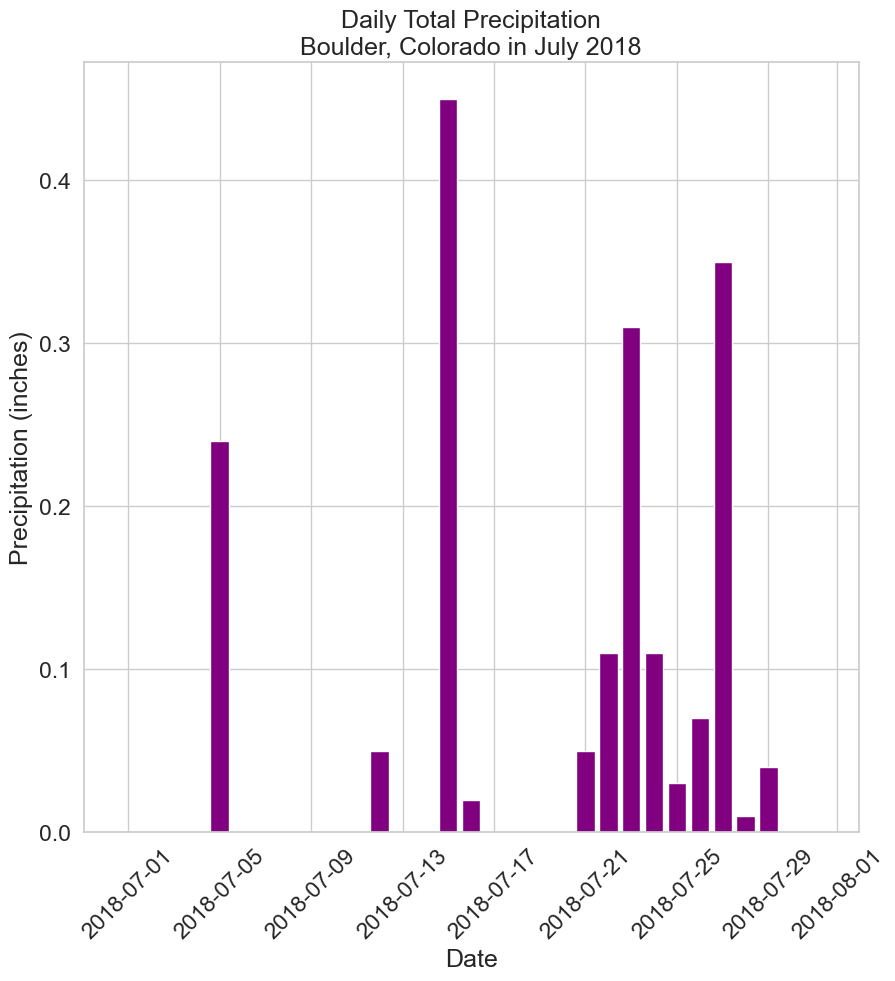

In [23]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

# Subset of date time


In [24]:
current_dir=os.getcwd()
file_path = os.path.join(current_dir, "data", "colorado-flood",
                         "precipitation",
                         "805325-precip-dailysum-2003-2013.csv")
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       parse_dates=['DATE'],
                                       index_col= ['DATE'],
                                       na_values=['999.99'])
boulder_precip_2003_2013.head()

/var/folders/xm/fv3xp5152cv47n_qnfs797z00000gn/T/ipykernel_25412/1201399494.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  boulder_precip_2003_2013 = pd.read_csv(file_path,


,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
2003-01-05,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,5
2003-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
2003-02-02,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,33
2003-02-03,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,34


In [32]:
# Select 2013 data - view first few records
y2013=boulder_precip_2003_2013[boulder_precip_2003_2013.index.year == 2013]
y2013.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,1
2013-01-28,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,28
2013-01-29,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,29
2013-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,32
2013-02-14,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,45


In [34]:
# Select all December data - view first few rows
all_decembers=boulder_precip_2003_2013[boulder_precip_2003_2013.index.month == 12]
all_decembers.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-12-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,335
2004-12-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2004,336
2004-12-22,0.2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2004,357
2004-12-24,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2004,359
2005-12-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,335


In [35]:
# Select data for 1st of month - view first rows
first_day_month=boulder_precip_2003_2013[boulder_precip_2003_2013.index.day == 1]
first_day_month.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
2003-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
2003-03-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,60
2003-04-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,91
2003-05-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,121


In [36]:
precip_may_aug_2005 = boulder_precip_2003_2013['2005-05-01':'2005-08-31']
precip_may_aug_2005.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2005-05-01,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,121
2005-05-11,1.2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,131
2005-05-30,0.5,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,150
2005-05-31,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,151
2005-06-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,152


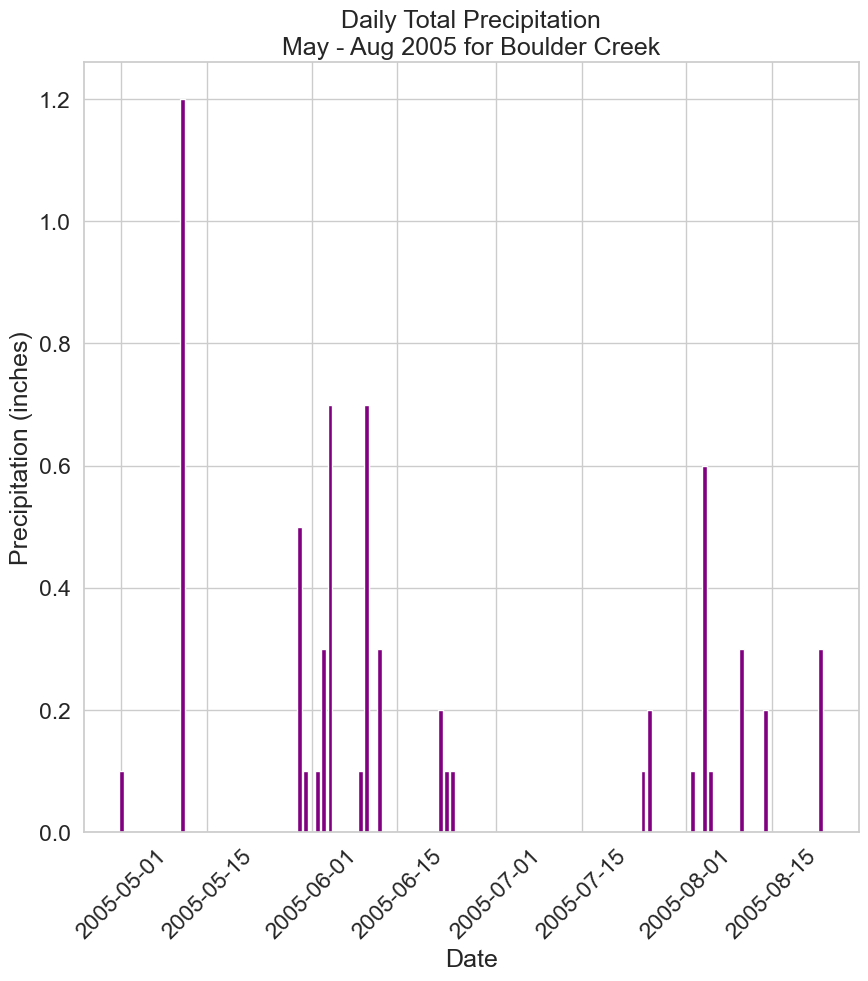

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(precip_may_aug_2005.index.values,
       precip_may_aug_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nMay - Aug 2005 for Boulder Creek")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()